In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 2: Load Dataset
df = pd.read_csv("housing.csv")

# Display first 5 rows
print(df.head())

# Check summary info
print(df.info())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
from sklearn.model_selection import train_test_split

# Features (all except target)
X = df.drop("median_house_value", axis=1)

# Target (house price)
y = df["median_house_value"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (16512, 9)
Testing set shape: (4128, 9)


In [4]:
print(df.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [5]:
train_data = X_train.join(y_train)

In [6]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN,103000.0
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN,382100.0
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN,172600.0
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN,93400.0
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND,96500.0
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN,229200.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND,97800.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN,222100.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN,283500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

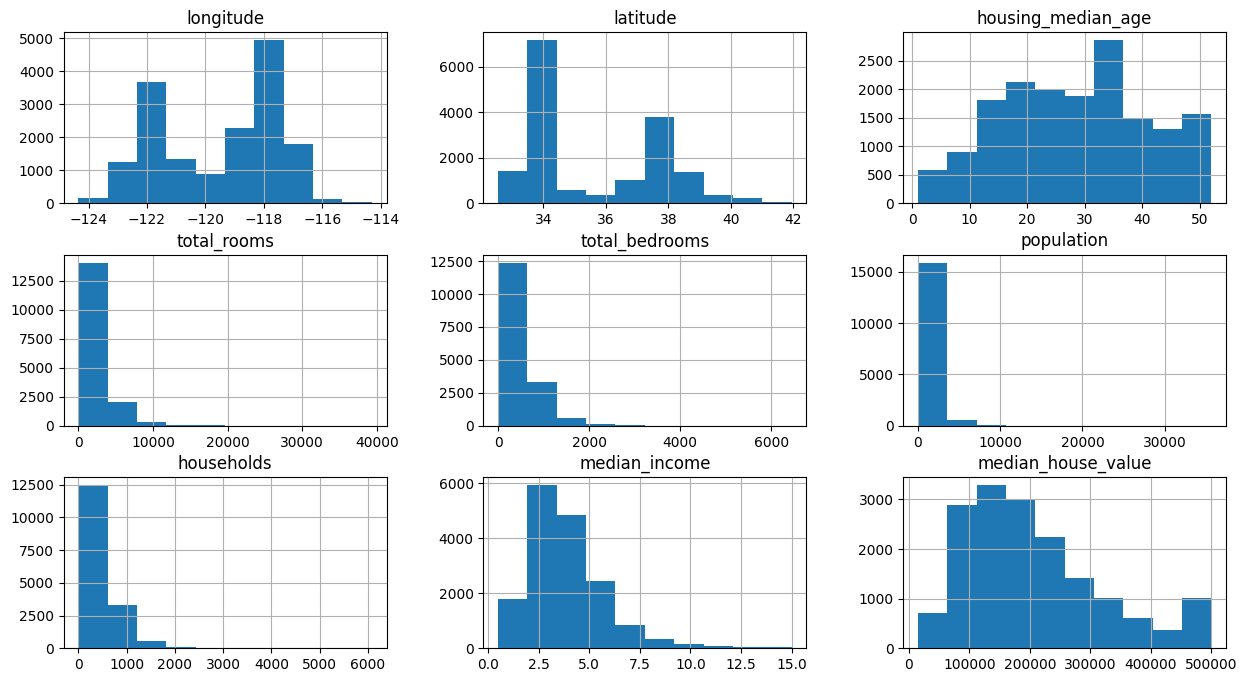

In [7]:
train_data.hist(figsize=(15, 8))

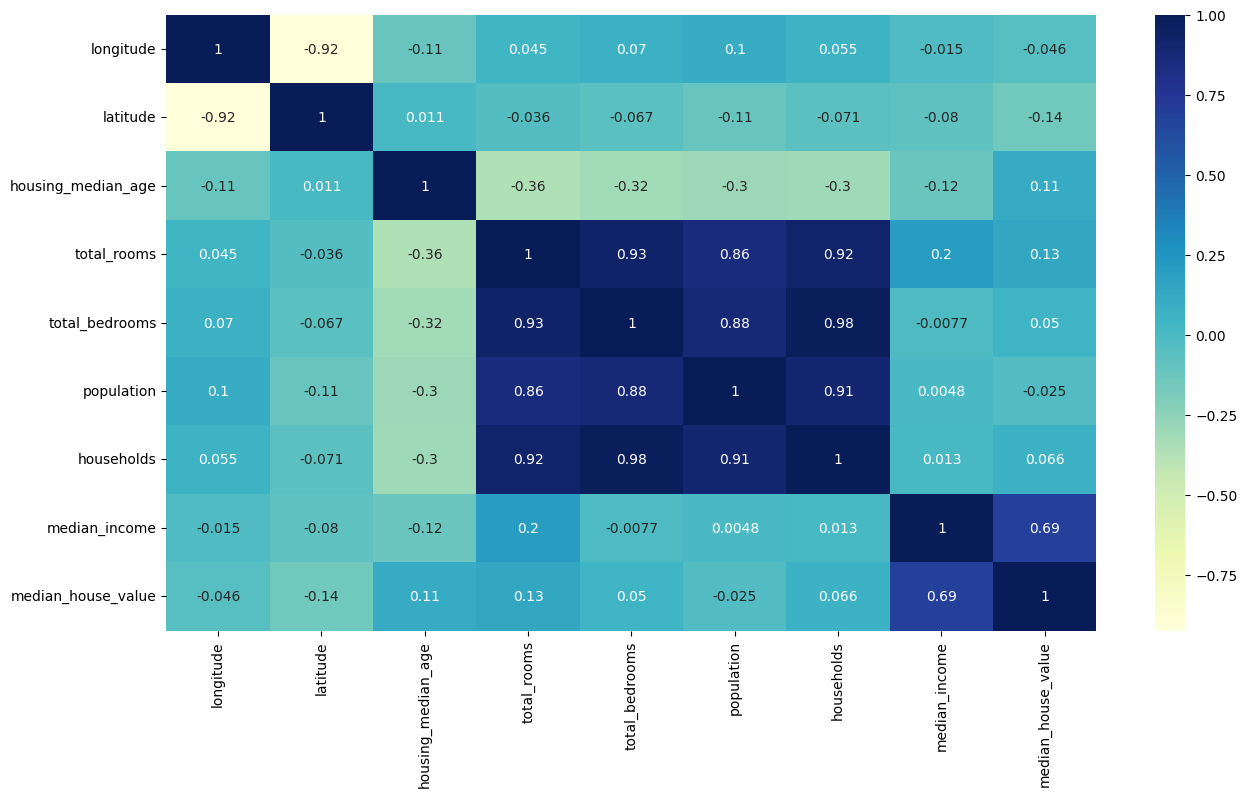

In [8]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(),
            annot=True, cmap="YlGnBu")
plt.show()


In [9]:

# Apply log( x + 1 ) to avoid log(0) issues
train_data['total_rooms']     = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms']  = np.log(train_data['total_bedrooms'] + 1)
train_data['population']      = np.log(train_data['population'] + 1)
train_data['households']      = np.log(train_data['households'] + 1)



array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

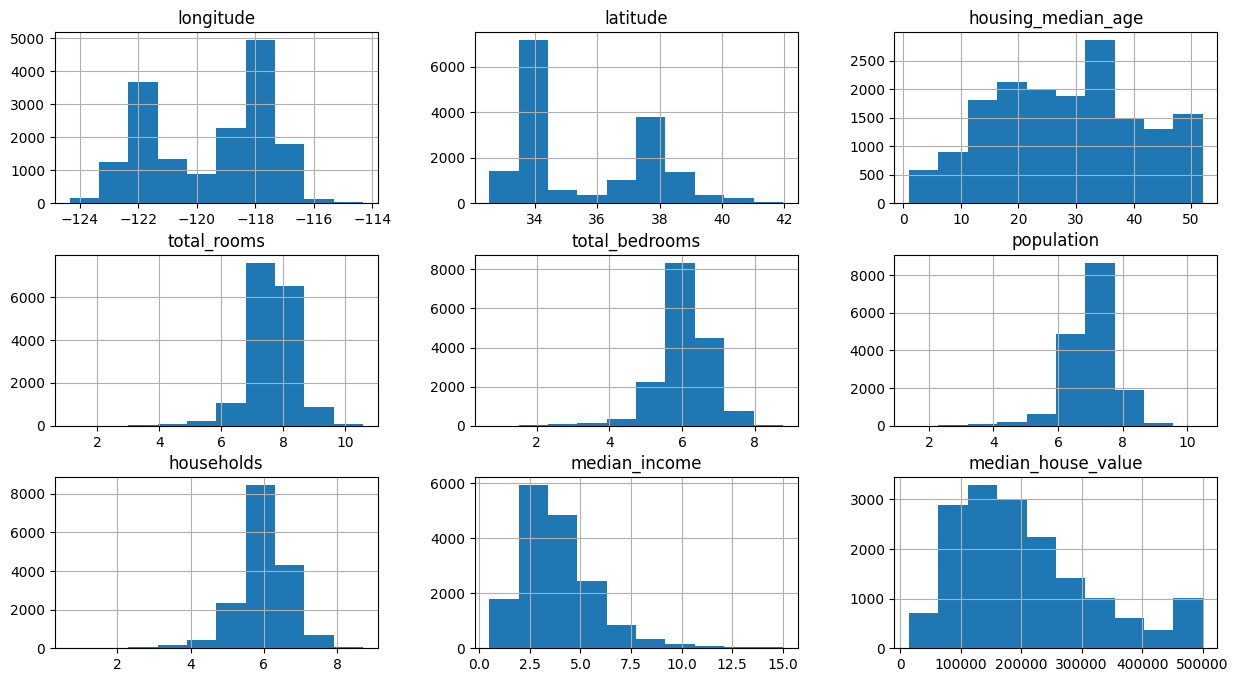

In [10]:
# Plot histograms after transformation
train_data.hist(figsize=(15, 8))

In [11]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,-117.03,32.71,33.0,8.047829,6.442540,7.741099,6.436150,3.2596,103000.0,False,False,False,False,True
8267,-118.16,33.77,49.0,8.126518,6.669498,7.181592,6.629363,3.8125,382100.0,False,False,False,False,True
17445,-120.48,34.66,4.0,7.548556,5.805135,6.820016,5.820083,4.1563,172600.0,False,False,False,False,True
14265,-117.11,32.69,36.0,7.259820,5.908083,7.257708,5.874931,1.9425,93400.0,False,False,False,False,True
2271,-119.80,36.78,43.0,7.776115,6.068426,6.774224,5.942799,3.5542,96500.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,7.193686,5.308268,6.490724,5.384495,6.3700,229200.0,True,False,False,False,False
11964,-117.43,34.02,33.0,8.034307,6.347389,7.469654,6.109248,3.0500,97800.0,False,True,False,False,False
5390,-118.38,34.03,36.0,7.650645,6.345636,7.471363,6.269096,2.9344,222100.0,True,False,False,False,False
860,-121.96,37.58,15.0,8.182000,6.393591,7.483244,6.327937,5.7192,283500.0,True,False,False,False,False


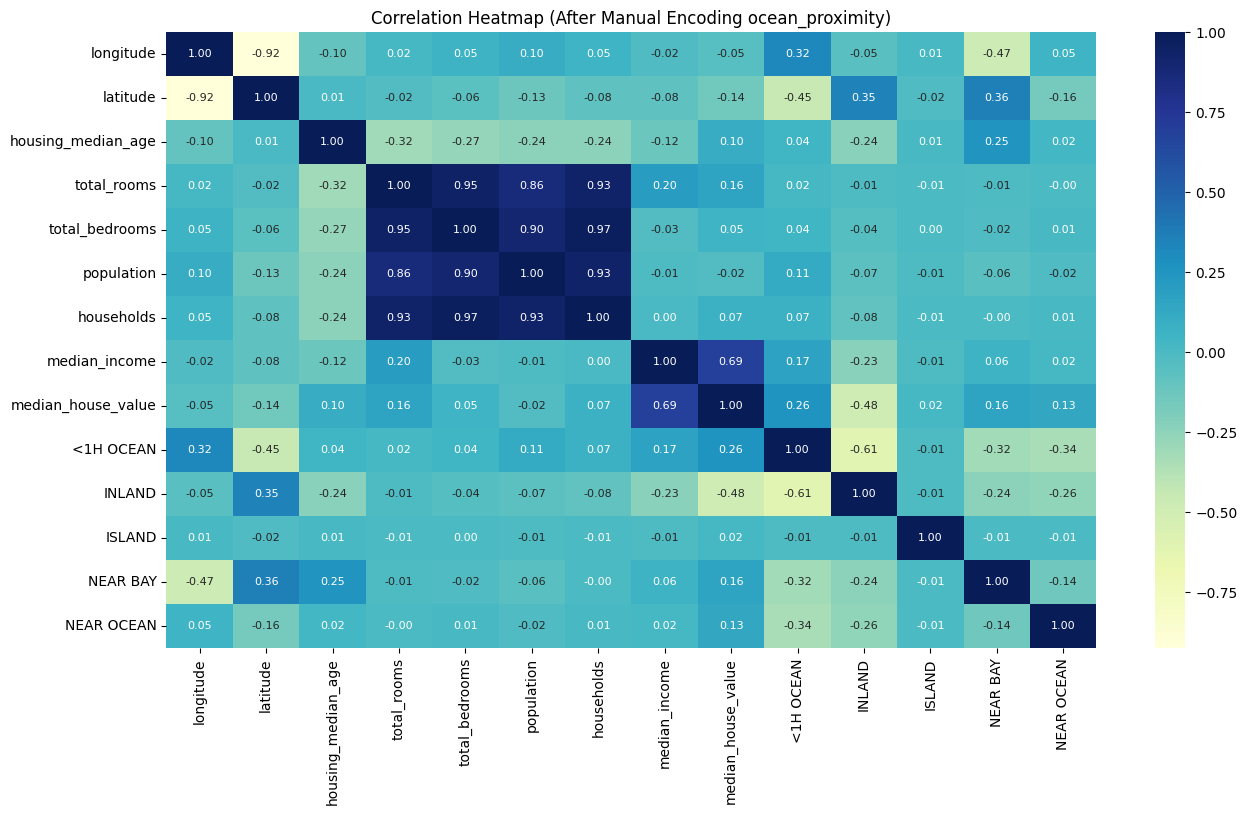

In [13]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, annot_kws={"size":8})
plt.title("Correlation Heatmap (After Manual Encoding ocean_proximity)")
plt.show()


<Axes: xlabel='latitude', ylabel='longitude'>

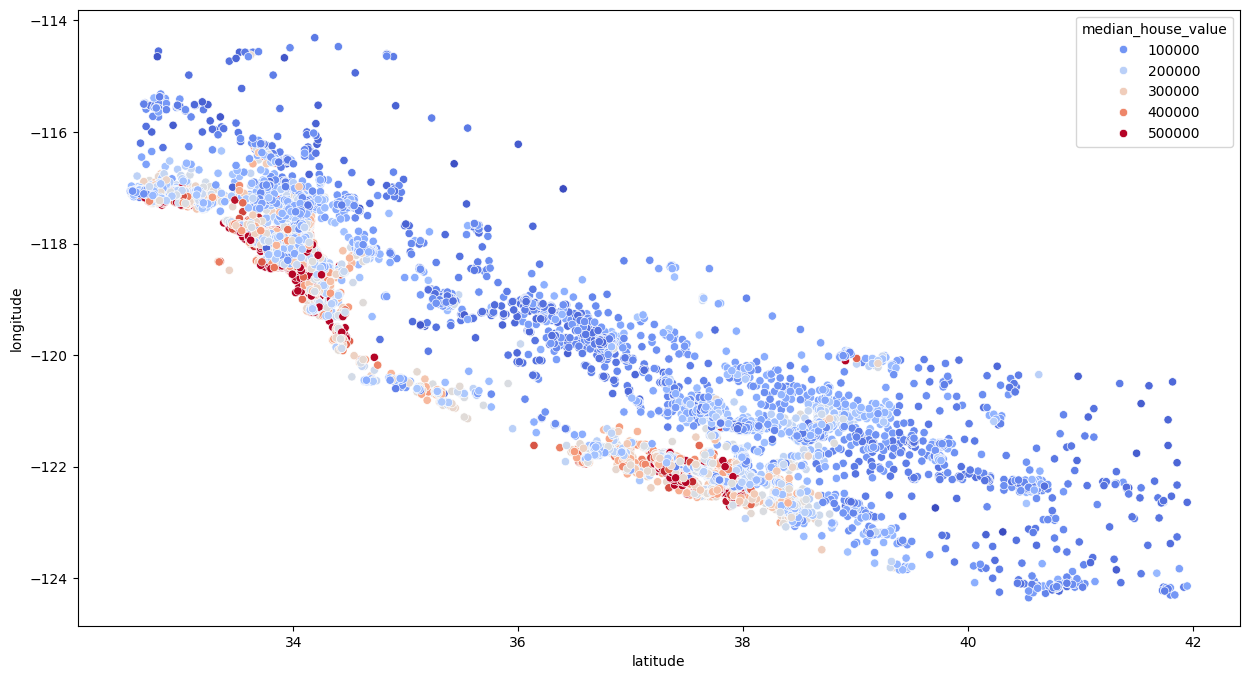

In [14]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [15]:
train_data['bedrooms_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']

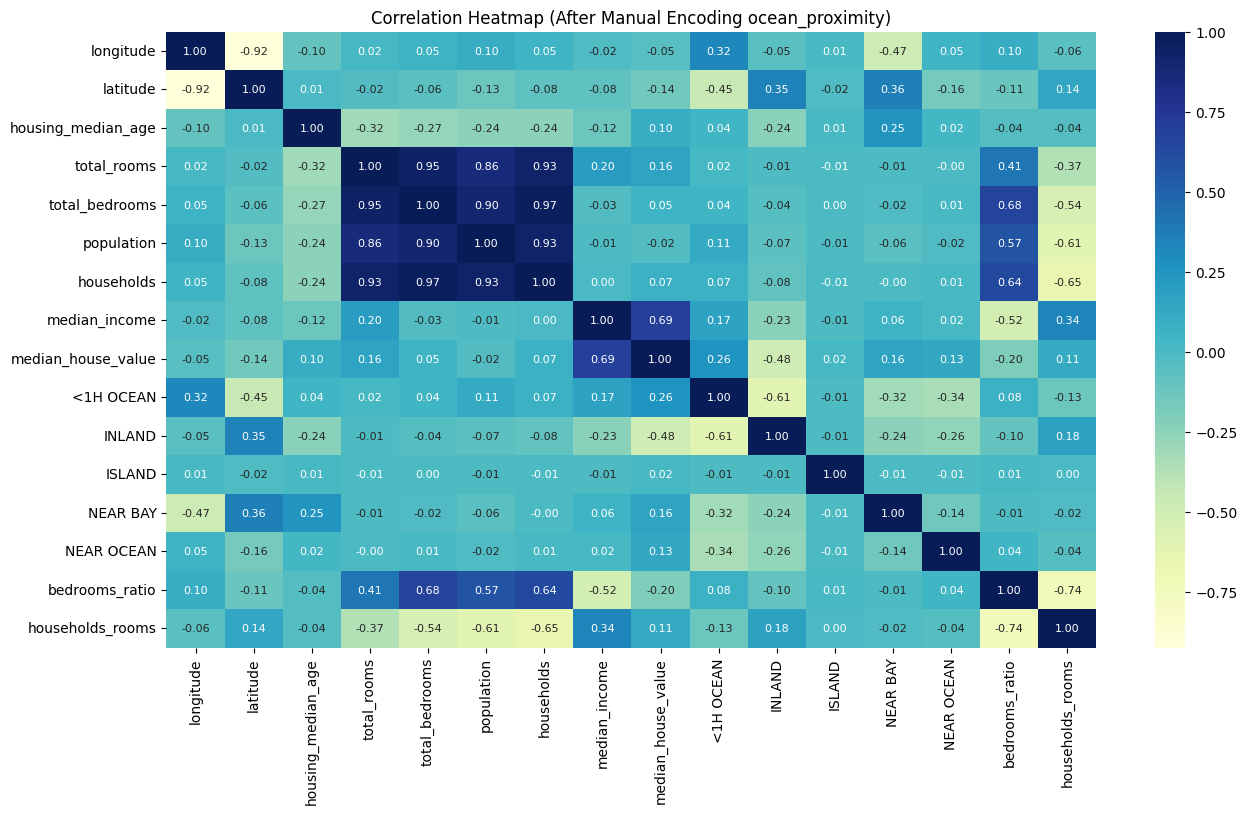

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, annot_kws={"size":8})
plt.title("Correlation Heatmap (After Manual Encoding ocean_proximity)")
plt.show()


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_train_s, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
test_data = X_test.join(y_test)

# Apply log( x + 1 ) to avoid log(0) issues
test_data['total_rooms']     = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms']  = np.log(test_data['total_bedrooms'] + 1)
test_data['population']      = np.log(test_data['population'] + 1)
test_data['households']      = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test_data['bedrooms_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']

In [19]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,households_rooms
20046,-119.01,36.06,25.0,7.317212,NaN,7.239215,5.886104,1.6812,47700.0,False,True,False,False,False,NaN,1.243133
3024,-119.46,35.14,30.0,7.987524,NaN,7.356280,6.371612,2.5313,45800.0,False,True,False,False,False,NaN,1.253611
15663,-122.44,37.80,52.0,8.250881,NaN,7.178545,6.871091,3.4801,500001.0,False,False,False,True,False,NaN,1.200811
20484,-118.72,34.28,17.0,8.023552,NaN,7.441907,6.206576,5.7376,218600.0,True,False,False,False,False,NaN,1.292750
9814,-121.93,36.62,34.0,7.763021,NaN,6.969791,6.061457,3.7250,278000.0,False,False,False,False,True,NaN,1.280719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,8.060224,6.180017,7.209340,6.115892,4.6050,263300.0,True,False,False,False,False,0.766730,1.317915
16623,-120.83,35.36,28.0,8.371936,6.787845,7.409136,6.559615,2.7266,266800.0,False,False,False,False,True,0.810786,1.276285
18086,-122.05,37.31,25.0,8.321665,6.289716,7.368970,6.343880,9.2298,500001.0,True,False,False,False,False,0.755824,1.311763
2144,-119.76,36.77,36.0,7.827241,6.146329,7.113142,6.163315,2.7850,72300.0,False,True,False,False,False,0.785249,1.269973


In [20]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [21]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,households_rooms
20046,-119.01,36.06,25.0,7.317212,NaN,7.239215,5.886104,1.6812,False,True,False,False,False,NaN,1.243133
3024,-119.46,35.14,30.0,7.987524,NaN,7.356280,6.371612,2.5313,False,True,False,False,False,NaN,1.253611
15663,-122.44,37.80,52.0,8.250881,NaN,7.178545,6.871091,3.4801,False,False,False,True,False,NaN,1.200811
20484,-118.72,34.28,17.0,8.023552,NaN,7.441907,6.206576,5.7376,True,False,False,False,False,NaN,1.292750
9814,-121.93,36.62,34.0,7.763021,NaN,6.969791,6.061457,3.7250,False,False,False,False,True,NaN,1.280719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,8.060224,6.180017,7.209340,6.115892,4.6050,True,False,False,False,False,0.766730,1.317915
16623,-120.83,35.36,28.0,8.371936,6.787845,7.409136,6.559615,2.7266,False,False,False,False,True,0.810786,1.276285
18086,-122.05,37.31,25.0,8.321665,6.289716,7.368970,6.343880,9.2298,True,False,False,False,False,0.755824,1.311763
2144,-119.76,36.77,36.0,7.827241,6.146329,7.113142,6.163315,2.7850,False,True,False,False,False,0.785249,1.269973


In [22]:
print("NaNs in x_test:", np.isnan(x_test).sum())
print("NaNs in y_test:", np.isnan(y_test).sum())

NaNs in x_test: longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
bedrooms_ratio        207
households_rooms        0
dtype: int64
NaNs in y_test: 0


In [23]:
x_test = x_test.dropna()
y_test = y_test.loc[x_test.index]  # keep same indices


In [24]:
x_test_s = scaler.transform(x_test)

In [25]:
reg.score(x_test_s, y_test)

0.6576997490416214

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
forest = RandomForestRegressor()

# Train the model
forest.fit(x_train_s, y_train)



,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
# Evaluate the model
(forest.score(x_test_s, y_test))

0.8100299976814975

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train_s, y_train, X_test_s, and y_test are already defined

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(x_train_s, y_train)




In [ ]:

best_model = grid_search.best_estimator_
print(best_model)


In [ ]:
score = grid_search.best_estimator_.score(X_test_s, y_test)
print(score)
